<a href="https://colab.research.google.com/github/Sumitkevlani/End-to-End-ML-projects/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

**Importing the Boston House Prediction Dataset**

In [4]:
housing_dataset = pd.read_csv('HousingData.csv')

In [5]:
housing_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
housing_dataset.shape

(506, 14)

In [7]:
#checking for NA values
num_rows_with_na = housing_dataset.isna().any(axis=1).sum()

In [10]:
print('Number of rows having null values: ',num_rows_with_na)

Number of rows having null values:  112


In [11]:
housing_dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [12]:
#replacing the missing values with the mean values of the respective column
mean = housing_dataset.mean()
housing_dataset.fillna(mean, inplace=True)

In [13]:
housing_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
#getting statistical measures of the dataset
housing_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Understanding the correlation between the various features
 of the dataset**
 1. Positive Correlation
 2. Negative Correlation

 Positive correlation means when one attribute increases, the other one also increases.

 Negative correlation means when one attribute increases, the other one decreases.

In [15]:
correlation = housing_dataset.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


<Axes: >

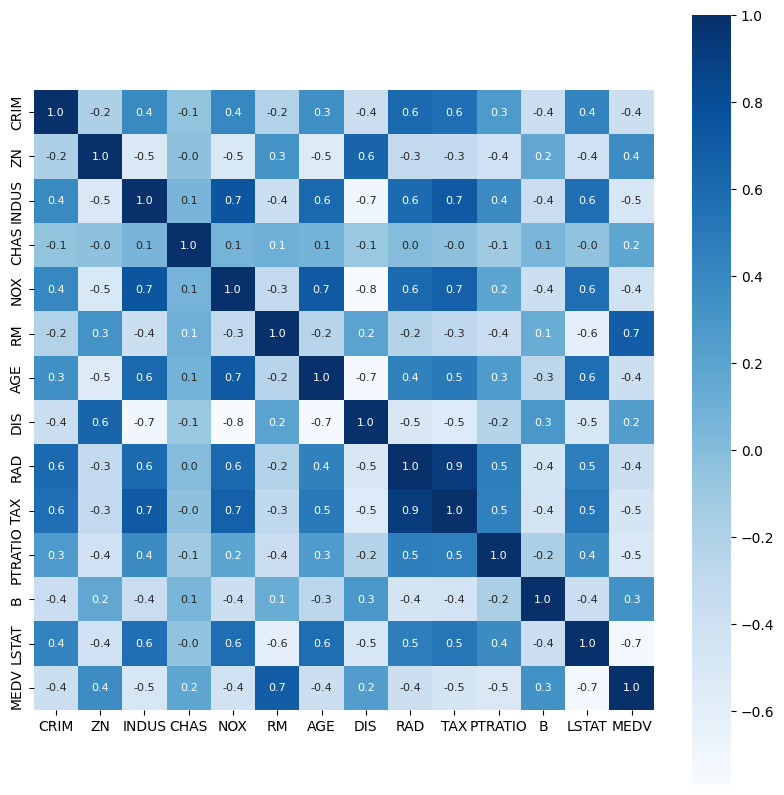

In [16]:
#constructing a heat map for the correlation
#cbar=True for the color bar
#fmt=.1f for 1 digit precision after the point
#annot=True require annotations like names and values
#annot_kws={'size':8} is specified here
#cmap='Blues' for blue color plot
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

From the heatmap, we can conclude that:

RAD and TAX have high positive correlation.(corr=0.9)

NOX and DIS have high negative correlation.(corr=-0.9)


In [17]:
X = housing_dataset.drop(columns='MEDV',axis=1)
Y = housing_dataset['MEDV']
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM  ...     DIS  RAD  TAX  PTRATIO       B      LSTAT
0    0.00632  18.0   2.31   0.0  0.538  6.575  ...  4.0900    1  296     15.3  396.90   4.980000
1    0.02731   0.0   7.07   0.0  0.469  6.421  ...  4.9671    2  242     17.8  396.90   9.140000
2    0.02729   0.0   7.07   0.0  0.469  7.185  ...  4.9671    2  242     17.8  392.83   4.030000
3    0.03237   0.0   2.18   0.0  0.458  6.998  ...  6.0622    3  222     18.7  394.63   2.940000
4    0.06905   0.0   2.18   0.0  0.458  7.147  ...  6.0622    3  222     18.7  396.90  12.715432
..       ...   ...    ...   ...    ...    ...  ...     ...  ...  ...      ...     ...        ...
501  0.06263   0.0  11.93   0.0  0.573  6.593  ...  2.4786    1  273     21.0  391.99  12.715432
502  0.04527   0.0  11.93   0.0  0.573  6.120  ...  2.2875    1  273     21.0  396.90   9.080000
503  0.06076   0.0  11.93   0.0  0.573  6.976  ...  2.1675    1  273     21.0  396.90   5.640000
504  0.10959   0.0  11.93   0.

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [21]:
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (455, 13) (51, 13)


**Training the Model(XGBoost Regressor: Decision Tree Based Regression Algorithm)**

In [22]:
model = XGBRegressor()

In [23]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Evaluating the Model**

For continuous valued predictions, we use R squared error and mean absolute error.

In [26]:
training_house_price_prediction = model.predict(X_train)

In [27]:
print(training_house_price_prediction)

[30.724667   4.9966617 35.395287  27.891453  18.426825  18.506557
 17.52719   15.594345  22.412624  20.312054  20.5907    19.744898
 28.183273  35.10289   27.496572  48.509     27.483774  11.480437
 22.005148  13.202037   7.4006305 20.584694  20.090519  25.143686
 22.018585  19.100126  24.280611  19.394934  23.918095  34.91164
 19.34131   21.393381  26.613277  37.600105  35.996513  21.398018
 23.636103  24.803022  19.902021  20.890764  18.233425  10.902453
 43.979362  43.503094   8.304374  46.70322   32.898605  21.695723
 14.304505  29.095543  23.751804  23.152433  21.03246   20.09837
 34.693436  13.898605  13.504553  21.991816  15.185931  10.900063
 22.69541   13.793157   5.60296   29.816435  50.01052   34.89891
 20.60103   23.390087  19.174177  32.6994    19.603094  26.992613
  8.402957  46.002476  21.688885  27.046762  19.39647   19.304523
 24.81332   22.587456  31.708965  18.559895   8.698399  17.41226
 23.702528  13.3024235 10.510088  12.755211  24.99315   19.700434
 14.885509  24

In [41]:
rsquared_error = metrics.r2_score(training_house_price_prediction,Y_train)

In [42]:
print('R squared error for the training data: ',rsquared_error)

R squared error for the training data:  0.9999955351711677


In [43]:
mean_absolute_error = metrics.mean_absolute_error(training_house_price_prediction,Y_train)

In [44]:
print('Mean absolute error for the training data: ',mean_absolute_error)

Mean absolute error for the training data:  0.01318752875694867


In [45]:
house_price_test_prediction = model.predict(X_test)

In [46]:
rsquared_error = metrics.r2_score(house_price_test_prediction,Y_test)

In [47]:
print('R squared error for the test data: ',rsquared_error)

R squared error for the test data:  0.8389972829566423


In [48]:
mean_absolute_error = metrics.mean_absolute_error(house_price_test_prediction,Y_test)

In [49]:
print('Mean absolute error for the test data: ',mean_absolute_error)

Mean absolute error for the test data:  2.4410483191995063


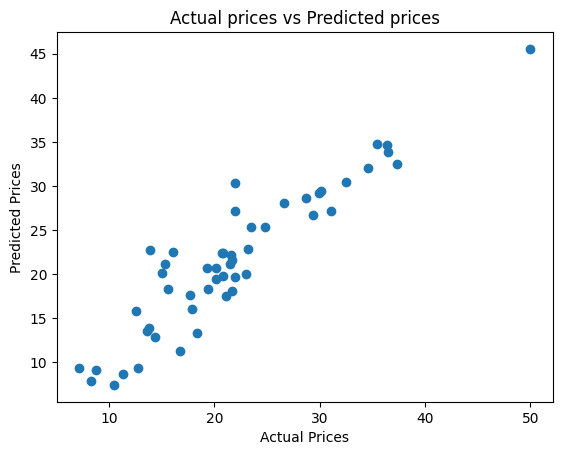

In [52]:
#plotting a scatter plot for the actual prices and the predicted prices

plt.scatter(Y_test,house_price_test_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual prices vs Predicted prices')
plt.show()